In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
file_path = "housing.csv"
data = pd.read_csv(file_path)

print("\n------ HEAD ------")
print(data.head())

print("\n------ INFO ------")
print(data.info())

print("\n------ DESCRIPTION ------")
print(data.describe())


------ HEAD ------
   area  bedrooms  bathrooms  stories  parking    price
0  1200         2          1        1        1  3500000
1  1500         3          2        1        1  4500000
2  1800         3          2        2        1  5600000
3  2400         4          3        2        2  7800000
4  3000         4          3        2        2  8500000

------ INFO ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       10 non-null     int64
 1   bedrooms   10 non-null     int64
 2   bathrooms  10 non-null     int64
 3   stories    10 non-null     int64
 4   parking    10 non-null     int64
 5   price      10 non-null     int64
dtypes: int64(6)
memory usage: 612.0 bytes
None

------ DESCRIPTION ------
             area   bedrooms  bathrooms    stories    parking         price
count    10.00000  10.000000  10.000000  10.000000  10.000000  1.000

In [8]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

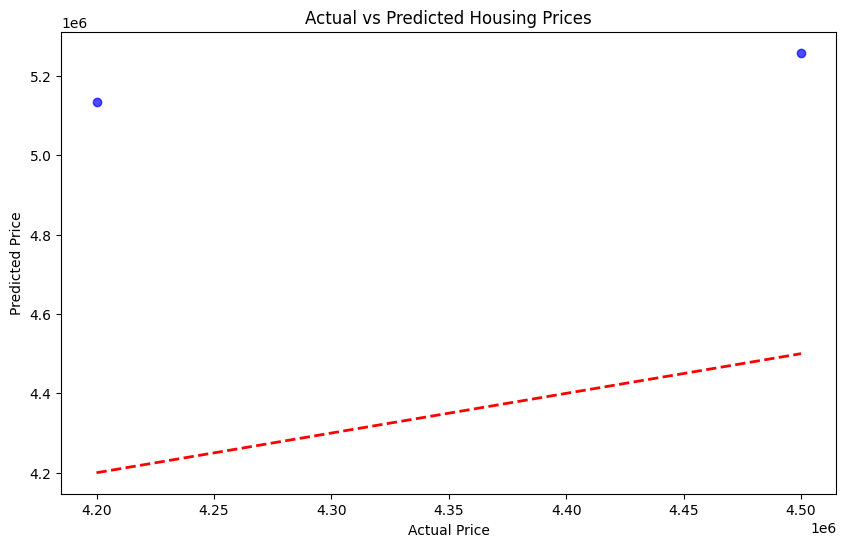

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.show()

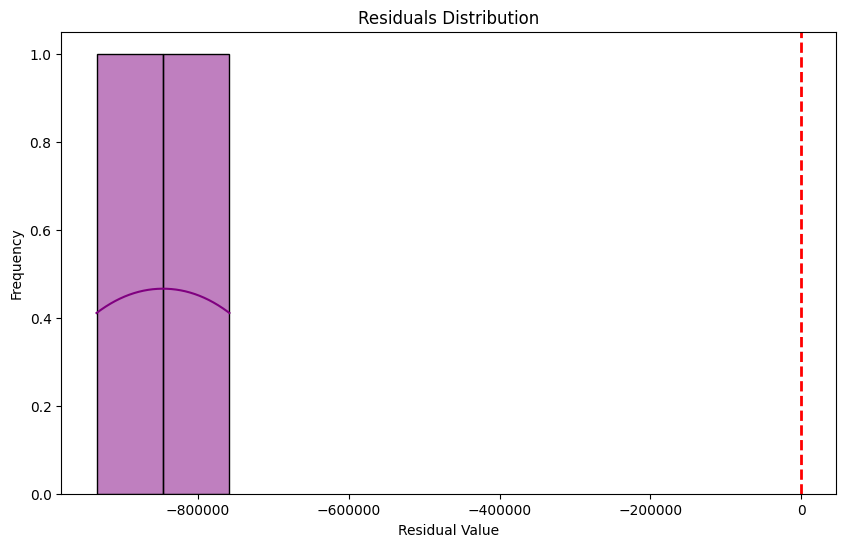

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
print("\nMean Squared Error:", mse)
print("R-Squared:", r2)


Mean Squared Error: 724266228532.0049
R-Squared: -31.18961015697799
